In [116]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$C_v = \frac{i}{2} R$

$C_p = \frac{i + 2}{2}R$

$C_p - C_v = R$

$U_{1/2/3}= \frac{3/5/6}{2}RT$

$P = \frac{RT}{V^\gamma} , \gamma = \frac{C_p} {C_v}$

$c = \sqrt{\frac{dP}{d\rho}}$ скорость продольной волны

$PV = \frac{m}{\mu} RT$

$p = \frac{\rho}{\mu}RT$

$\frac{dp}{d\rho} = \frac{RT}{\mu}$

$q = 0; \implies \frac{p}{\rho^\gamma} = const$

$c_Q = \sqrt{\gamma} c_v$


In [3]:
print(sqrt(8.31 * 27.3 / (29)) * 100)

279.6937980893662


In [4]:
print( 330 / 1000)

0.33




$f = f_0 + \frac{cm}{2L_0}$

$C = L * f$

$l = L / n$

$$

In [68]:
L = 0.795 # m

#воздух 

#Гц
f1 = [652, 864 , 1074, 1289, 1500, 1710]  #повышение
f2 = [1706 , 1499 , 1285 , 1065, 860, 651] #понижение

In [17]:
s = ''
# f2.reverse()
# print(f2)

for i in range(len(f2)):
    s+= '&' + str(f2[i])
print(s)

&651&860&1065&1285&1499&1706


In [20]:
f = [round((f1[i] + f2[i])/2) for i in range(len(f1))]
s = ''
for i in range(len(f)):
    s+= '&' + str(f[i])
print(s)

&652&862&1070&1287&1500&1708


In [38]:
def mnk_val(x,y):
    x = np.array(x)
    y = np.array(y)
    t = (x*y).mean() - x.mean()*y.mean()
    b = (x*x).mean() - x.mean()**2
    t = float(t)
    b = float(b)
    return t/b

def err(x,y,k):
    x = np.array(x)
    y = np.array(y)
    t = (y*y).mean() - y.mean()**2
    b = (x*x).mean() - x.mean()**2
    t = float(t)
    b = float(b)
    return sqrt((t/b - k*k)/len(x))

def mnk_b(x,y,k):
    x = np.array(x)
    y = np.array(y)
    return y.mean() - k*x.mean()
    

In [39]:
OX = [i for i in range(1,7)]
OY = [f[i] - f[0] for i in range(6)]
k = mnk_val(OX,OY)
b = mnk_b(OX,OY,k)
sk = err(OX,OY,k)

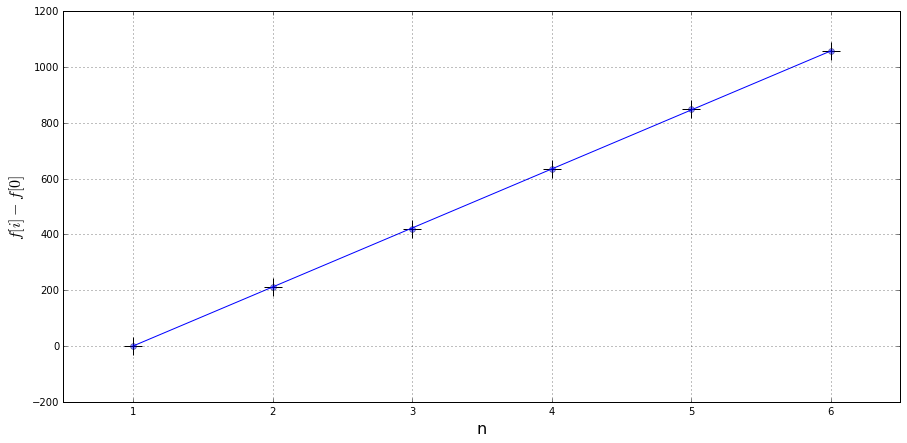

211.74285714285716
0.5134031227388947


In [57]:

plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlim(0.5,6.5)
plt.xlabel('n',size=16)
plt.ylabel(r'$f[i] - f[0]$',size=16)
plt.scatter(OX, OY, s=300 ,marker='+', color='black')
plt.plot(OX,OY,'o' , alpha=0.5)
plt.plot([1,6],[0,k * 6 + b], 'b')
plt.savefig('g1mm.png') 
plt.show()
print(k)
print(sk)

In [71]:
v = k * 2 * L
sv =2 * 2 * L * sk
print(v)
print(sv)

336.6711428571429
1.6326219303096852


In [72]:
T = (273.15 + 22.3)
R = 8.314
mu = 28.98 * 1e-3
sT = 0.1
gm = (mu * v **2) / (R * T)
sg = mu/R * ((2 * v * sv / T)**2 + (v**2 * sT/ T**2)**2)**0.5
print(gm)
print(mu * (2 * v * sv / T)/R)
print(sg)

1.3372609203586823
0.012969579077052625
0.012977474515802249


In [99]:
#Co2
f3 = [510 , round((510 + 833)/2), 833 , 1003, 1166, 1336, 1502, 1666] #повышение 2329 , 2495 
s = ''
for i in range(len(f3)):
    s+= '&' + str(f3[i])
print(s)

&510&672&833&1003&1166&1336&1502&1666


In [112]:
OX = [i for i in range(1,len(f3) + 1)]
OY = [f3[i] - f3[0] for i in range(len(f3))]
k = mnk_val(OX,OY)
b = mnk_b(OX,OY,k)
sk = err(OX,OY,k)

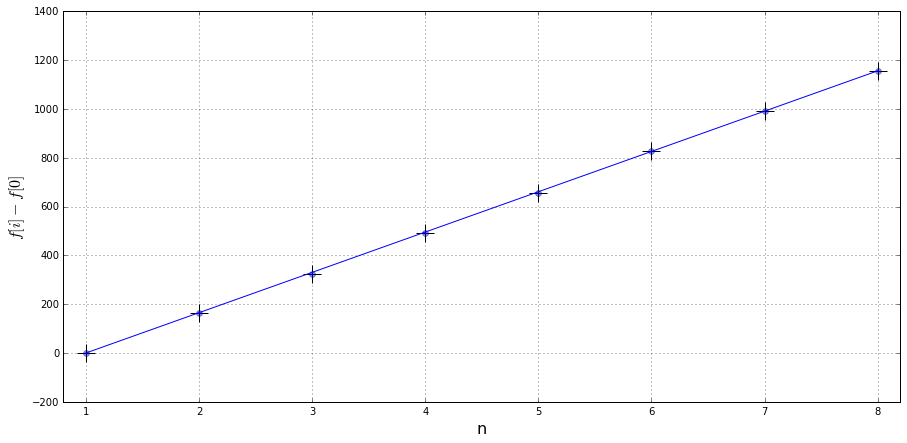

165.64285714285714
0.3804870670119648


In [113]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlim(0.8,8.2)
plt.xlabel('n',size=16)
plt.ylabel(r'$f[i] - f[0]$',size=16)
plt.scatter(OX, OY, s=300 ,marker='+', color='black')
plt.plot(OX,OY,'o' , alpha=0.5)
plt.plot([1,8],[0,k * 8 + b], 'b')
plt.savefig('g2mm.png') 
plt.show()
print(k)
print(sk)

In [114]:
v = k * 2 * L
sv = 2 * 2 * L * sk
print(v)
print(sv)

263.3721428571429
1.209948873098048


In [121]:
T = (273.15 + 22.3)
R = 8.314
mu = 44 * 1e-3
sT = 0.1
gm = (mu * v **2) / (R * T)
sg = mu/R * ((2 * v * sv / T)**2 + (v**2 * sT/ T**2)**2)**0.5
sg2 = gm * mu * ((sv/v)**2 + (sT/T)**2)**0.5 / R
print(sv)
print(gm)
print(mu * (2 * v * sv / T)/R)
print(sg)
print(sg2)

1.209948873098048
1.2425055478620777
0.01141630372251817
0.011424047019490664
3.0291003203904907e-05
